In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [4]:
baseraincloud_plot.fx <- function(mydf, yvar, xvar, fillvar, colpal, binw, pointsize) {
    p0 <- ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), fill = eval(parse(text = fillvar)))) +
        ggdist::stat_dist_halfeye(adjust = 0.5, .width = 0, justification = -0.1, point_color = NA, width = 0.7) +
        geom_boxplot(width = 0.1, outlier.shape = NA, alpha = 0.5) +
        ggdist::stat_dots(side = "left", justification = 1.1, binwidth = binw, dotsize = pointsize) +
        scale_fill_manual(values = colpal) +
        myaxis +
        myplot +
        theme(legend.position = "none") +
        labs(x = "", y = gsub("`", "", yvar) ) 
    return(p0)
}


# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [9]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

Exclude T-ALLs

In [10]:
table(meta_div$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                370                 136                 273                  44 

In [11]:
meta_div <- meta_div[ meta_div$cancergroup != "T-cell malignancies", ]

In [12]:
# meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

In [13]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [14]:
dim(pbmc)

[1] 505  66

In [15]:
# names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [16]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

Baseline comparisons

In [17]:
pbmc_01 <- pbmc[pbmc$cycle == "X01",]

In [18]:
p0 <- baseraincloud_plot.fx(pbmc_01, "`Naïve%`", "cancergroup", "cancergroup", group_col, 0.5, 4) 

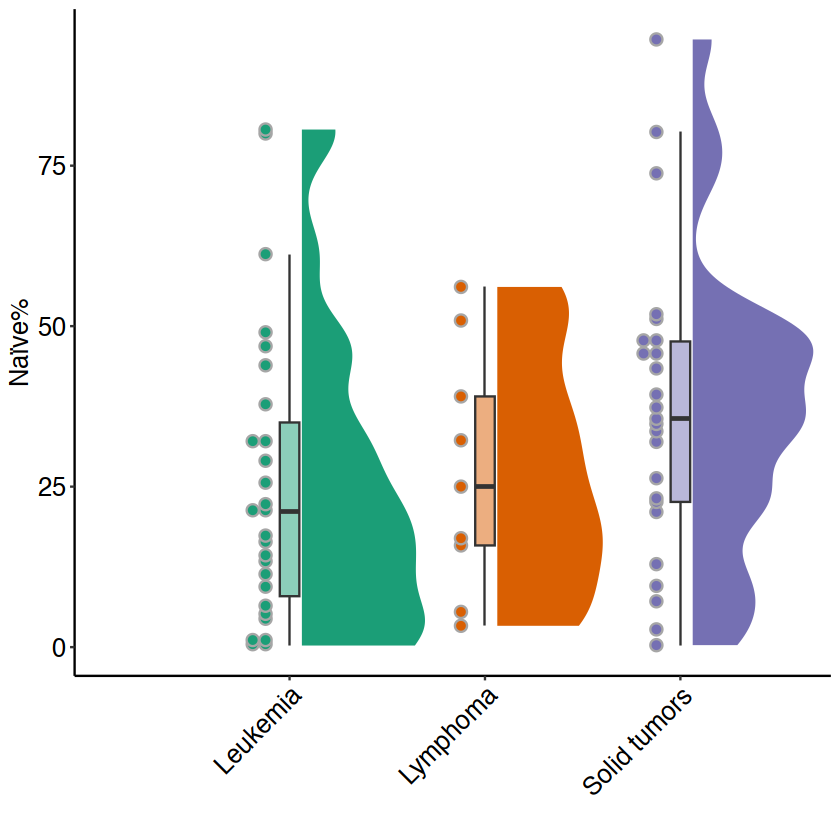

In [19]:
p0 

In [20]:
tapply(pbmc_01$`Naïve%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2445  7.9314 21.1640 25.3577 34.9947 80.6271 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.322  15.839  25.000  27.209  39.053  56.111 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3055 22.6195 35.5740 36.8239 47.6151 94.6625 


In [21]:
mytest <- "Naïve%"
mypval <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [22]:
mypval

[1] 0.05781055

In [23]:
mypval <- formatC(mypval, format = "e", digits = 2)

In [24]:
mypval

[1] "5.78e-02"

In [25]:
p0_stat <- p0 + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("Naïve%") ))

In [74]:
pdf(paste0(plotpath, "rainclouds_Naive_X01.pdf"), width = 4, height = 6)
p0_stat
dev.off()

pdf 
  2

In [26]:
p1 <- baseraincloud_plot.fx(pbmc_01, "`CM%`", "cancergroup", "cancergroup", group_col, 0.5, 2)  

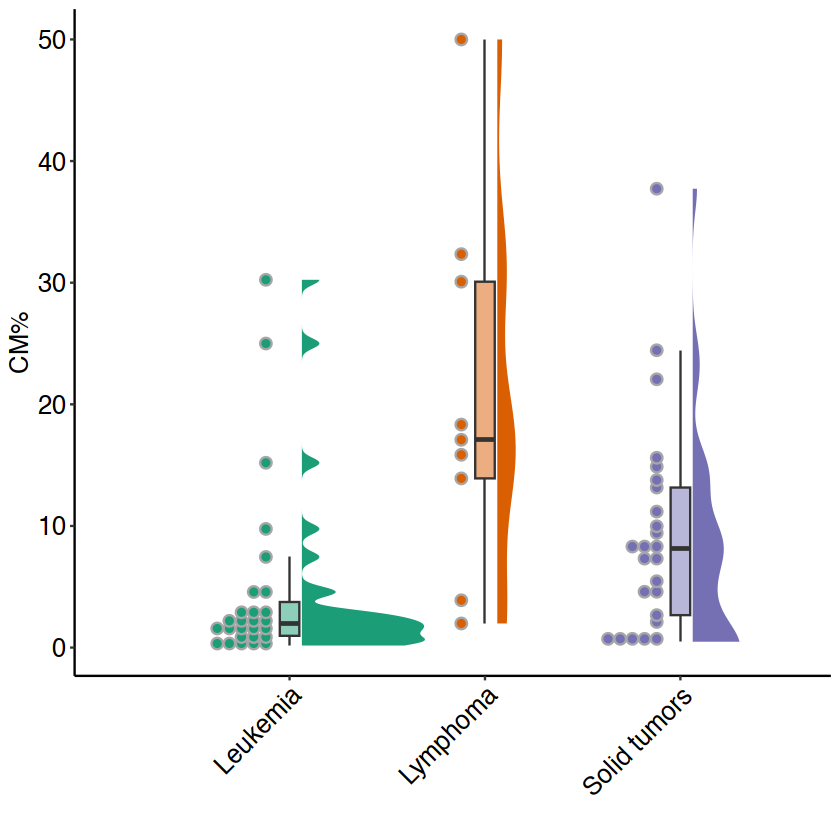

In [27]:
p1

In [28]:
mytest <- "CM%"
mypval1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [29]:
mypval1
mypval2

[1] 0.002145412

[1] 0.002806573

In [30]:
tapply(pbmc_01$`CM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667  0.9662  2.0157  4.6864  3.7482 30.2376 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.983  13.910  17.084  20.387  30.082  50.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4804  2.6672  8.1863  9.3959 13.1579 37.7260 


In [31]:
mypval1 <- formatC(mypval1, format = "e", digits = 2)
mypval2 <- formatC(mypval2, format = "e", digits = 2)

In [32]:
p1_stat <- p1 + geom_signif(
    y_position = c(90, 100), xmin = c(1,1), xmax = c(2,3),
    annotation = c(paste0("p = ",mypval1), paste0("p = ",mypval2)), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("CM%") ))

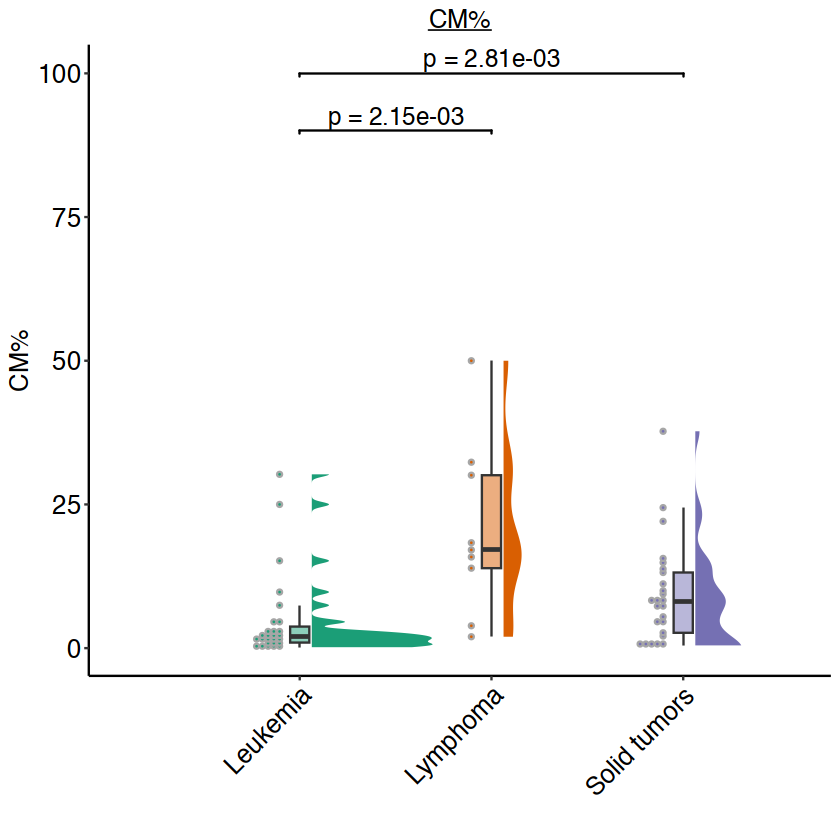

In [33]:
p1_stat

In [34]:
p2 <- baseraincloud_plot.fx(pbmc_01, "`TE%`", "cancergroup", "cancergroup", group_col, 0.5, 4)  

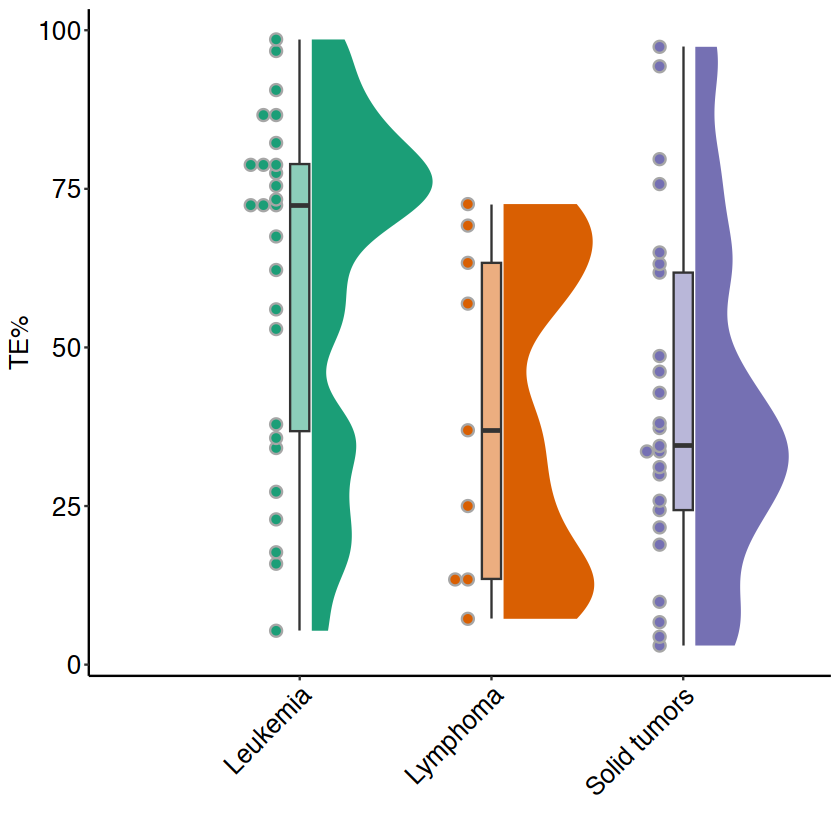

In [35]:
p2

In [36]:
mytest <- "TE%"
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [37]:
mypval3

[1] 0.009475695

In [38]:
mypval3 <- formatC(mypval3, format = "e", digits = 2)

In [39]:
tapply(pbmc_01$`TE%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.343  36.803  72.391  61.357  78.908  98.550 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.222  13.511  36.944  39.784  63.333  72.595 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.008  24.360  34.472  41.104  61.797  97.386 


In [40]:
p2_stat <- p2 + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval3), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TE%") ))

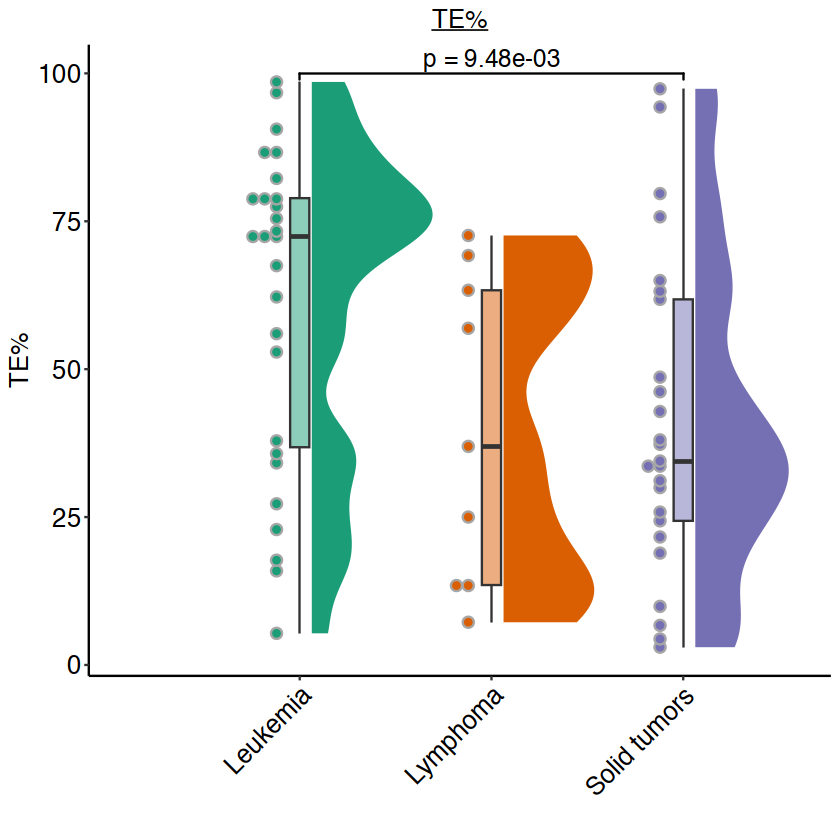

In [46]:
p2_stat

In [73]:
pdf(paste0(plotpath, "rainclouds_TE_X01.pdf"), width = 4, height = 6)
p2_stat
dev.off()

pdf 
  2

In [50]:
p3 <- baseraincloud_plot.fx(pbmc_01, "`PD1%`", "cancergroup", "cancergroup", group_col, 0.2, 3)  

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”


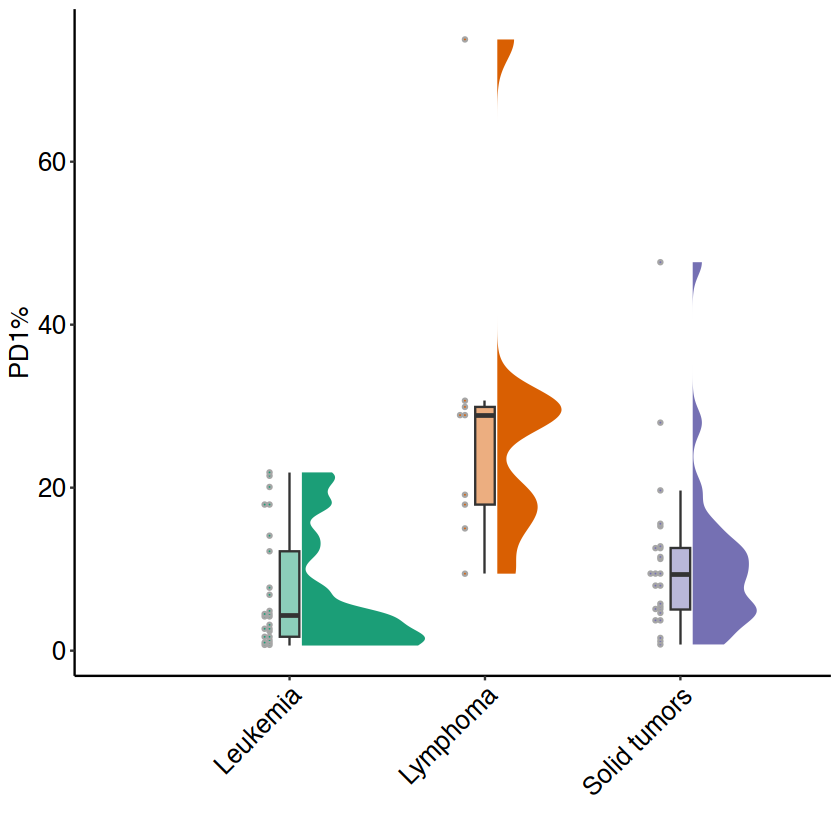

In [51]:
p3

In [52]:
tapply(pbmc_01$`LAG3%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.008   2.525   4.707   7.586  12.429  22.917       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.498  11.765  16.667  16.787  24.601  31.707 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3737  2.7493  6.9711  7.7082  9.6015 37.0508 


In [53]:
# mytest <- "LAG3%"
# mypval4 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
# mypval5 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [54]:
mypval4
mypval5

[1] 0.006451857

[1] 0.02263256

In [55]:
mytest <- "PD1%"
mypval4 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [56]:
mypval4
mypval5

[1] 0.001603698

[1] 0.0008445937

In [57]:
tapply(pbmc_01$`PD1%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6279  1.7083  4.2779  7.2600 12.1951 21.8750       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.444  17.924  28.842  28.321  29.909  75.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  5.0496  9.3715 10.7284 12.5997 47.6662 


In [58]:
mypval4 <- formatC(mypval4, format = "e", digits = 2)
mypval5 <- formatC(mypval5, format = "e", digits = 2)

In [59]:
p3_stat <- p3 + geom_signif(
    y_position = c(90, 100), xmin = c(1,2), xmax = c(2,3),
    annotation = c(paste0("p = ",mypval4), paste0("p = ",mypval5) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("PD1%") ))

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


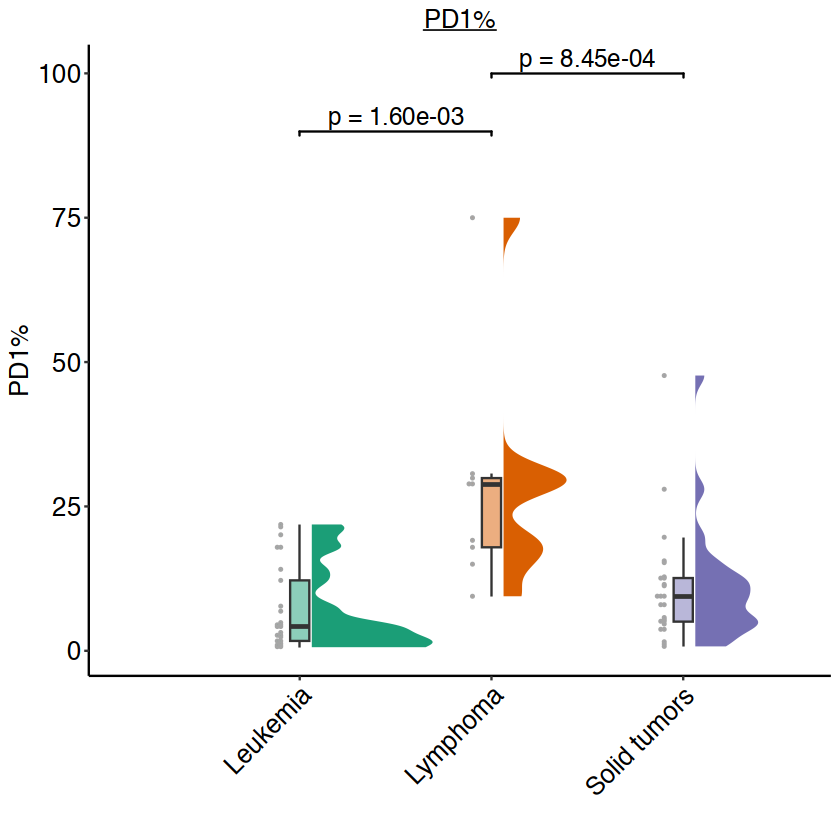

In [60]:
p3_stat

In [72]:
pdf(paste0(plotpath, "rainclouds_PD1_X01.pdf"), width = 4, height = 6)
p3_stat
dev.off()

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


pdf 
  2

In [62]:
p3_1 <- baseraincloud_plot.fx(pbmc_01, "`LAG3%`", "cancergroup", "cancergroup", group_col, 0.2, 3)  

In [64]:
mytest <- "LAG3%"
mypval4_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [67]:
mypval4_1 <- formatC(mypval4_1, format = "e", digits = 2)
mypval5_1 <- formatC(mypval5_1, format = "e", digits = 2)

In [68]:
p3_stat_1 <- p3_1 + geom_signif(
    y_position = c(90, 100), xmin = c(1,2), xmax = c(2,3),
    annotation = c(paste0("p = ",mypval4_1), paste0("p = ",mypval4_1) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("LAG3%") ))

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


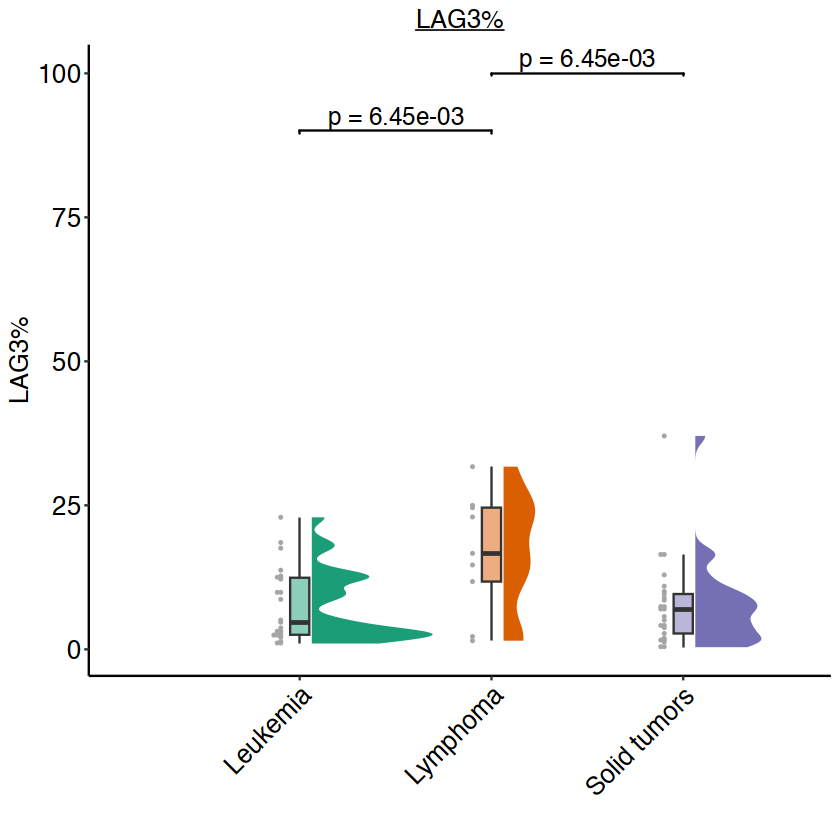

In [69]:
p3_stat_1

In [71]:
pdf(paste0(plotpath, "rainclouds_LAG3_X01.pdf"), width = 4, height = 6)
p3_stat_1
dev.off()

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


pdf 
  2

In [65]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc_01 <- pbmc[pbmc$cycle == "X01",]
pbmc_01 <- pbmc_01[ !is.na(pbmc_01$TRB),]

In [66]:
p4 <- baseraincloud_plot.fx(pbmc_01, "log10shann", "cancergroup", "cancergroup", group_col, 0.01, 4)  

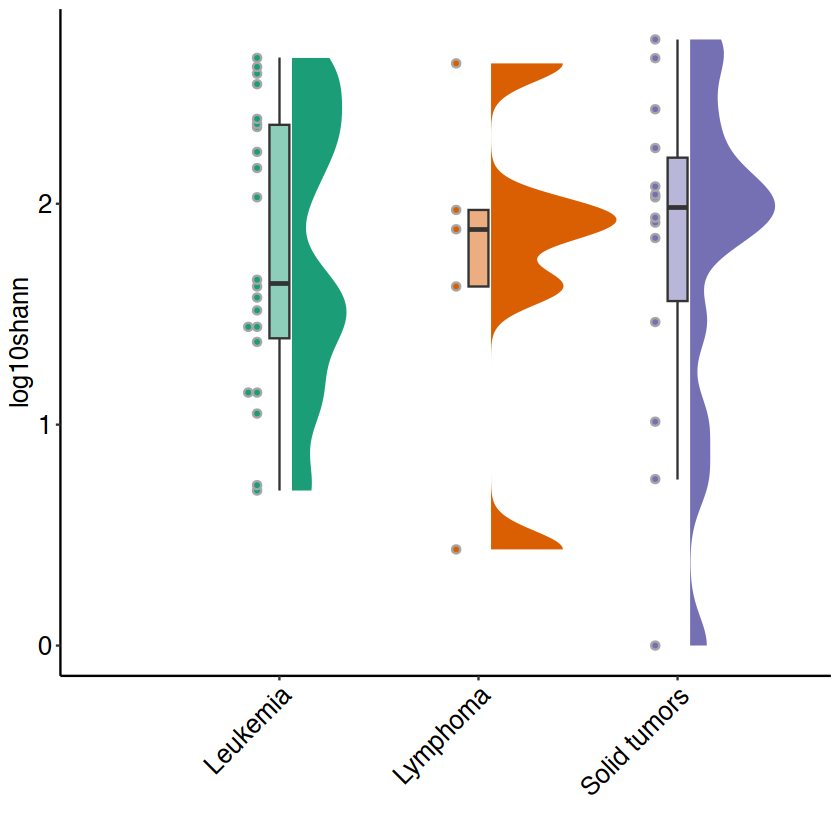

In [47]:
p4

In [48]:
mytest <- "log10shann"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.5187846

[1] 0.8989843

[1] 0.8108015

In [49]:
mybreaks <- c(1, 10, 100, 500, 1000, 1500)
# mybreaks <- c(1, 10, 50, 100)

In [50]:
p4_1 <- p4 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("TCR diversity") )) +
labs(y = "TCR diversity (log10)")

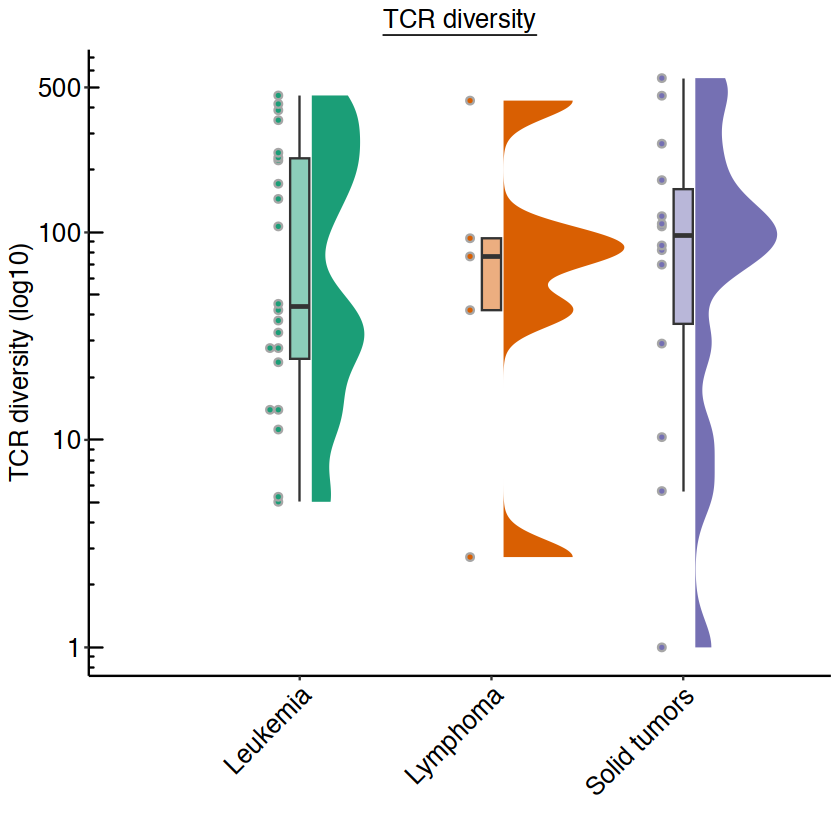

In [51]:
p4_1

In [52]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]
cfdna_01 <- cfdna[cfdna$cycle == "X01",]
cfdna_01 <- cfdna_01[ !is.na(cfdna_01$TRB),]

In [53]:
p5 <- baseraincloud_plot.fx(cfdna_01, "log10shann", "cancergroup", "cancergroup", group_col, 0.01, 3)  

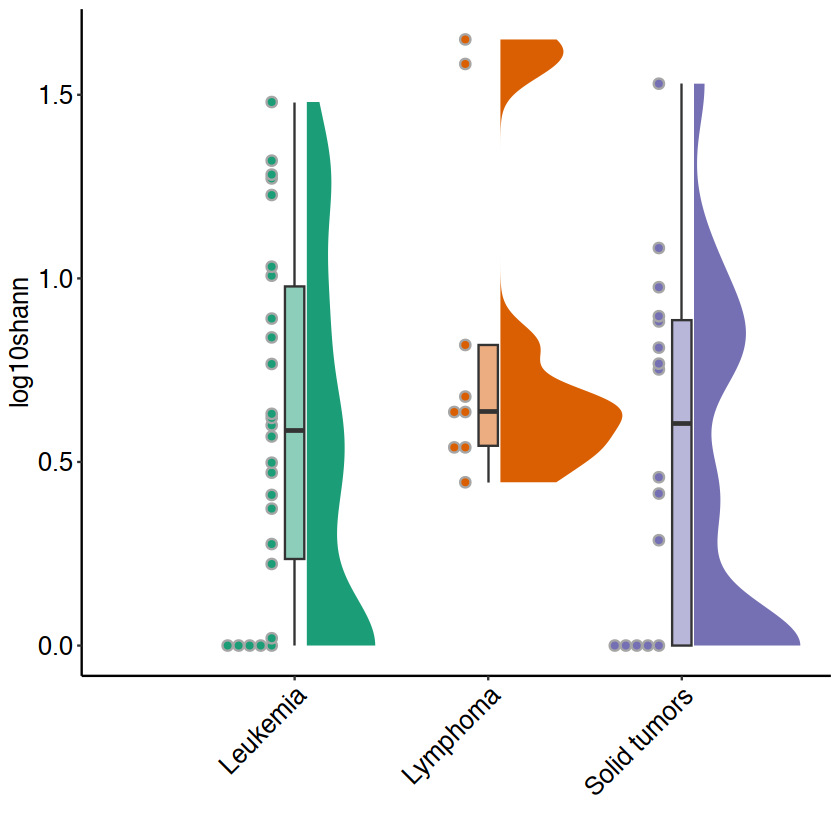

In [54]:
p5

In [55]:
mytest <- "log10shann"
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value

[1] 0.9422676

[1] 0.1568585

[1] 0.2234618

In [56]:
# mybreaks <- c(1, 10, 100, 500, 1000, 1500)
mybreaks <- c(1, 10, 50, 100)

In [57]:
p5_1 <- p5 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("cfTCR diversity") )) + labs(y = "cfTCR diversity (log10)")

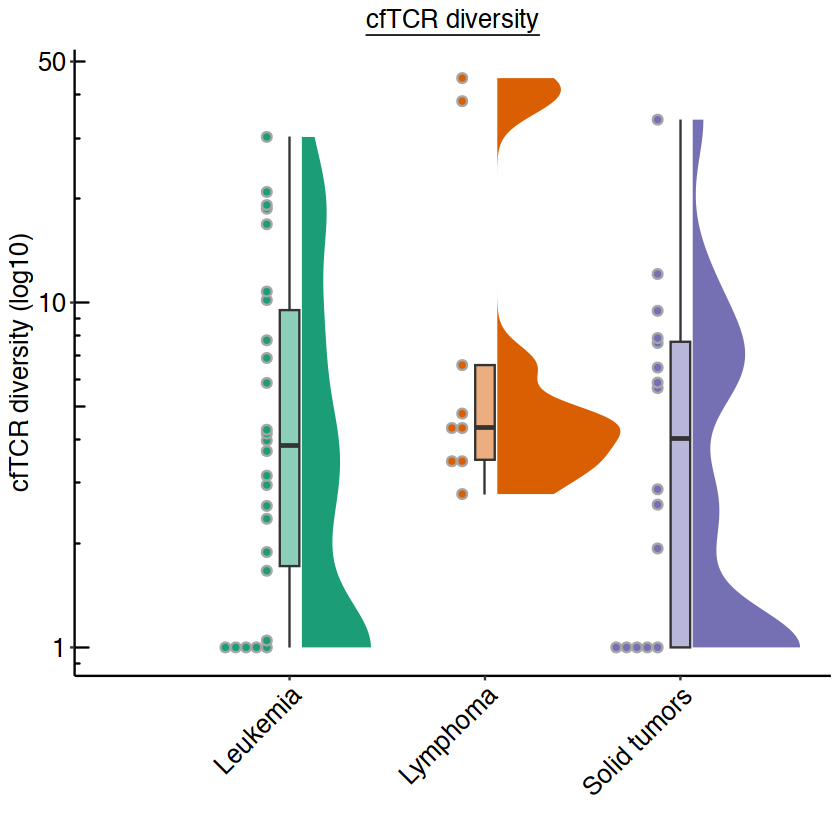

In [58]:
p5_1

In [59]:
pdf(paste0(plotpath, "rainclouds_X01_naive_cm_te_pd1_div.pdf"), width = 18, height = 6)
plot_grid(p0_stat, p1_stat, p2_stat, p3_stat, p4_1, p5_1, nrow = 1, align = "h", axis = "lr")
dev.off()

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


pdf 
  2

# Backup

## over time comparisons

solid tumors

In [60]:
pbmc_solid <- pbmc[ which(pbmc$cancergroup == "Solid tumors"),]

In [61]:
p1 <- baseraincloud_plot.fx(pbmc_solid, "`Naïve%`", "cycle", "cancergroup", group_col, 0.5, 2)  

In [62]:
mytest <- "Naïve%"
mypval1 <- ks.test(pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X01")], pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X02")])$p.value

In [63]:
mypval1 <- formatC(mypval1, format = "e", digits = 2)

In [64]:
p1_stat <- p1 + geom_signif(
    y_position = 100, xmin = 1, xmax = 2,
    annotation = paste0("p = ",mypval1), tip_length = 0.01, textsize = 5
  ) + theme(axis.text.x = element_blank()) + ggtitle(expression(underline("Solid tumors") ))

Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_signif()`).”


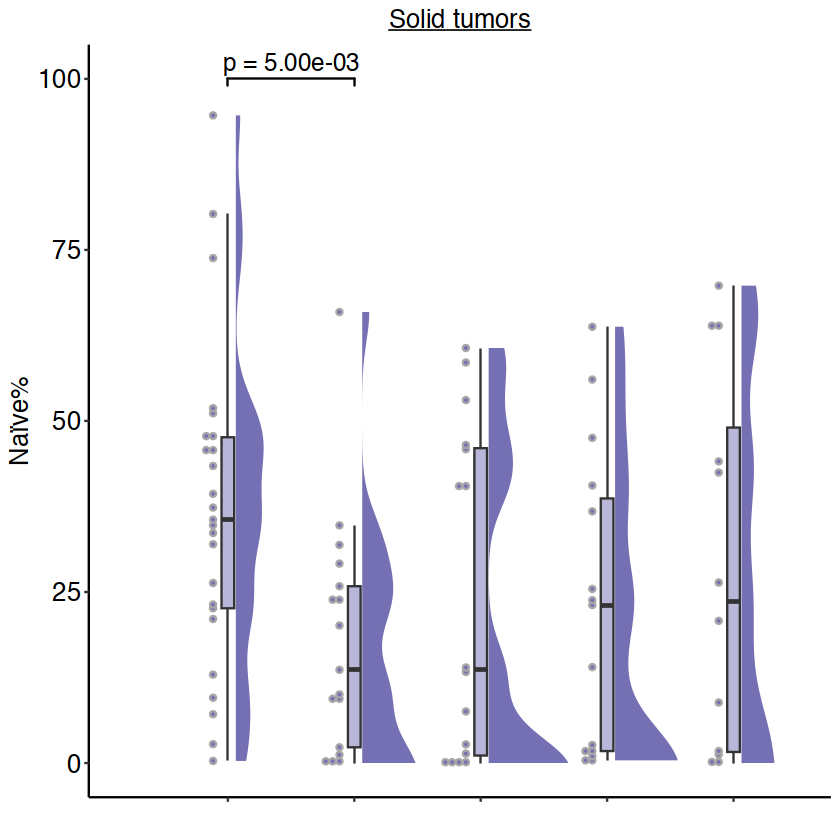

In [65]:
p1_stat

In [66]:
p2 <- baseraincloud_plot.fx(pbmc_solid, "`TE%`", "cycle", "cancergroup", group_col, 0.5, 2)  

Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 91 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”


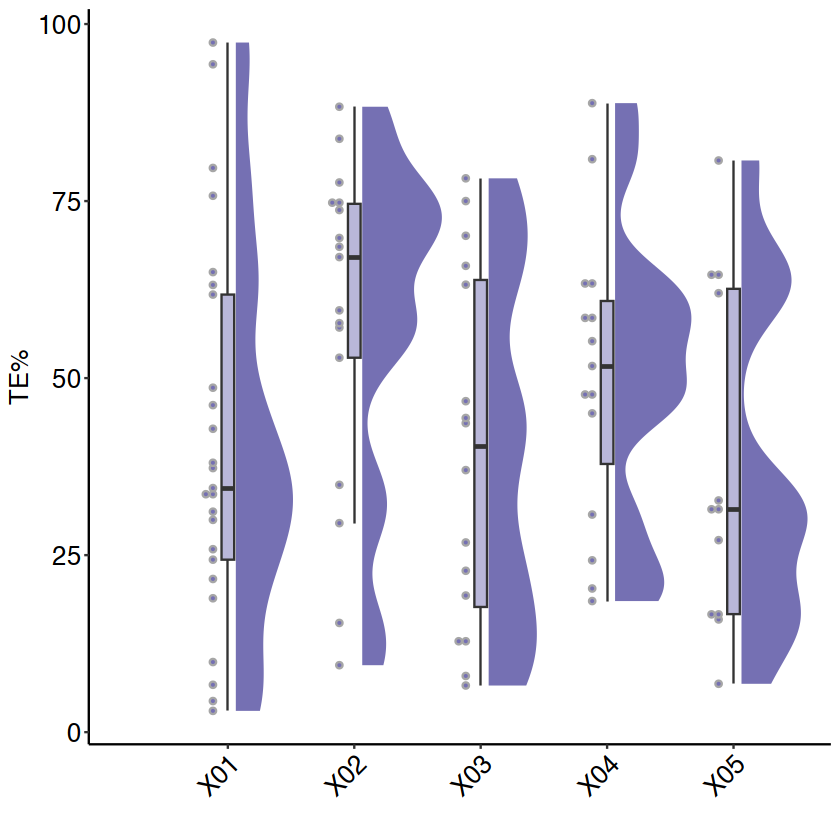

In [67]:
p2

In [68]:
mytest <- "TE%"
mypval2 <- ks.test(pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X01")], pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X02")])$p.value
mypval2 <- formatC(mypval2, format = "e", digits = 2)

In [69]:
4.07e-01

[1] 0.407

In [70]:
p2_stat <- p2 + geom_signif(
    y_position = 100, xmin = 1, xmax = 2,
    annotation = paste0("p = ",mypval2), tip_length = 0.01, textsize = 5
  ) 

Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 91 rows containing non-finite values (`stat_signif()`).”


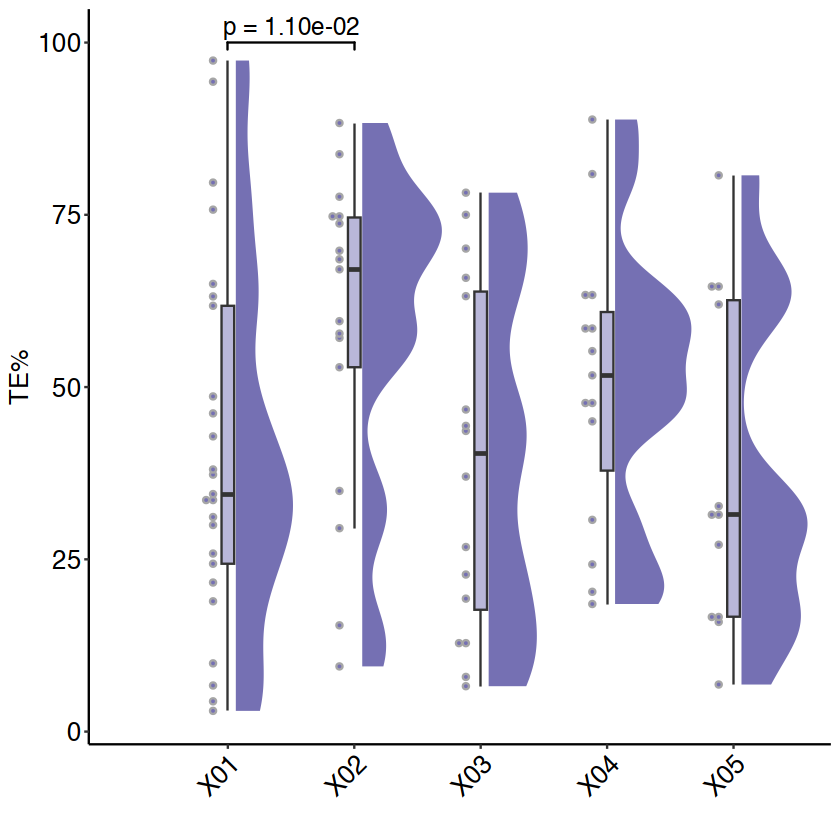

In [71]:
p2_stat

In [72]:
p3 <- baseraincloud_plot.fx(pbmc_solid, "`PD1%`", "cycle", "cancergroup", group_col, 0.5, 2)  

In [73]:
mytest <- "PD1%"
mypval3 <- ks.test(pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X01")], pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X03")])$p.value
mypval4 <- ks.test(pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X01")], pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X04")])$p.value
mypval5 <- ks.test(pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X01")], pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X05")])$p.value

In [74]:
mypval3 <- formatC(mypval3, format = "e", digits = 2)
mypval4 <- formatC(mypval4, format = "e", digits = 2)
mypval5 <- formatC(mypval5, format = "e", digits = 2)

In [75]:
p3_stat <- p3 + geom_signif(
    y_position = c(50,60,70), xmin = c(1,1,1), xmax = c(3,4,5),
    annotation = c(paste0("p = ",mypval3), paste0("p = ",mypval4), paste0("p = ",mypval5) ) , tip_length = 0.01, textsize = 5
  ) 

In [76]:
p4 <- baseraincloud_plot.fx(pbmc_solid, "`LAG3%`", "cycle", "cancergroup", group_col, 0.5, 2)  

In [77]:
mytest <- "LAG3%"
mypval6 <- ks.test(pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X01")], pbmc_solid[[mytest]][ which(pbmc_solid$cycle == "X04")])$p.value

In [78]:
mypval6 <- formatC(mypval6, format = "e", digits = 2)

In [79]:
p4_stat <- p4 + geom_signif(
    y_position = 80, xmin = 1, xmax = 4,
    annotation = paste0("p = ",mypval3) , tip_length = 0.01, textsize = 5
  ) 

Warning message:
“Removed 93 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 93 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 93 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 93 rows containing non-finite values (`stat_signif()`).”


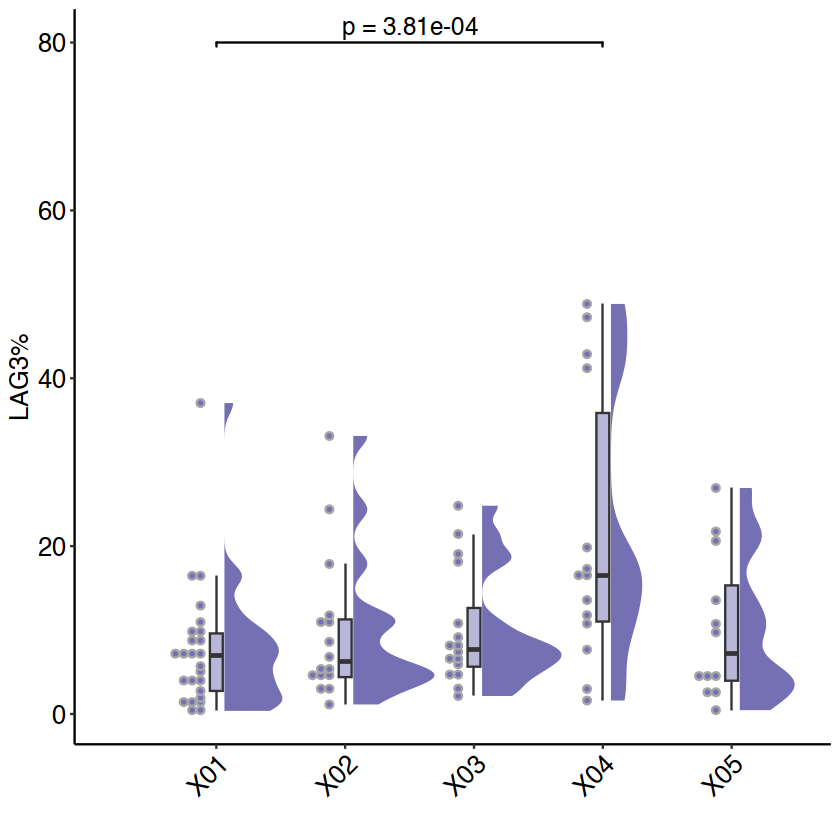

In [80]:
p4_stat

In [81]:
pdf(paste0(plotpath, "rainclouds_naive_te_pd1_lag3_solid.pdf"), width = 4, height = 10)
plot_grid(p1_stat, p2_stat, p3_stat, p4_stat, nrow = 4, align = "v", axis = "lr")
dev.off()

Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 91 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 91 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 93 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 93 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 93 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 93 rows containing non-finite values (`s

pdf 
  2

In [82]:
# remove p1 p2 p3 p4 p1_stat p2_stat p3_stat p4_stat
rm(p1, p2, p3, p4, p1_stat, p2_stat, p3_stat, p4_stat)

Leukemias

In [83]:
pbmc_leu <- pbmc[ which(pbmc$cancergroup == "Leukemia"),]

In [84]:
p1 <- baseraincloud_plot.fx(pbmc_leu, "`CM%`", "cycle", "cancergroup", group_col, 0.5, 2)  

Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”


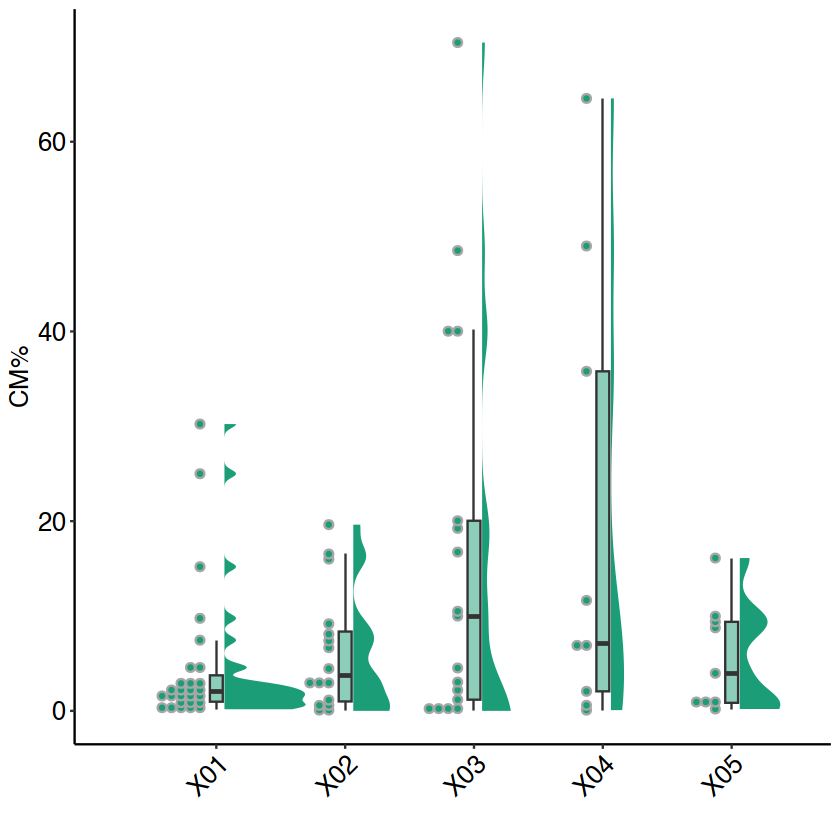

In [85]:
p1

In [86]:
mytest <- "CM%"
mypval1 <- ks.test(pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X01")], pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X03")])$p.value

In [87]:
mypval1 <- formatC(mypval1, format = "e", digits = 2)

In [88]:
p1_stat <- p1 + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval1), tip_length = 0.01, textsize = 5
  ) + theme(axis.text.x = element_blank()) + ggtitle(expression(underline("Leukemia") ))

Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_signif()`).”


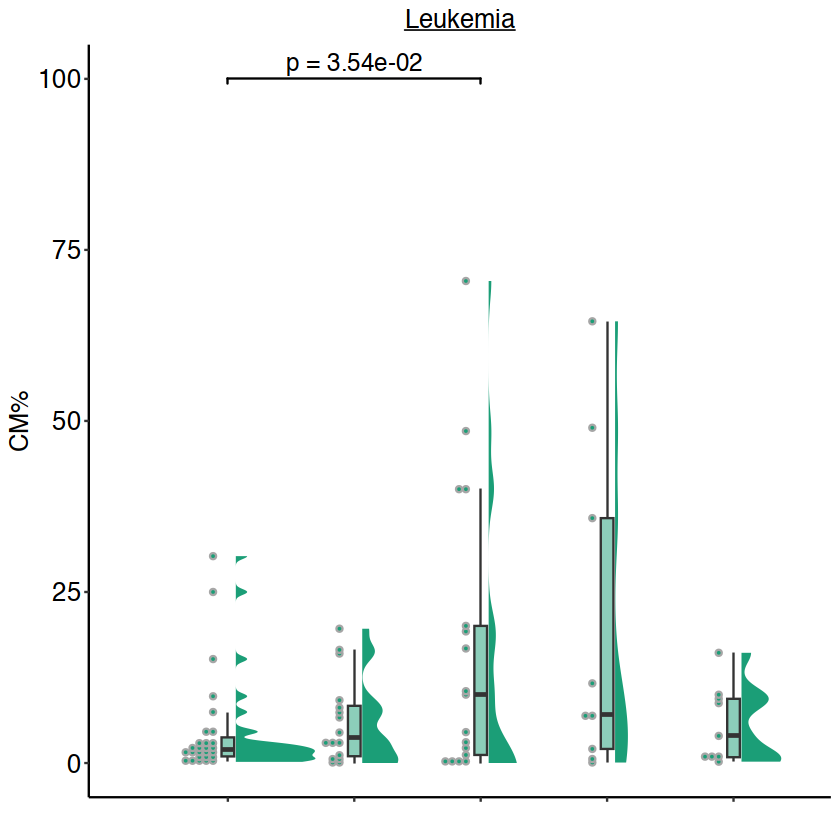

In [89]:
p1_stat

In [90]:
p2 <- baseraincloud_plot.fx(pbmc_leu, "`TE%`", "cycle", "cancergroup", group_col, 0.5, 2)  

Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”


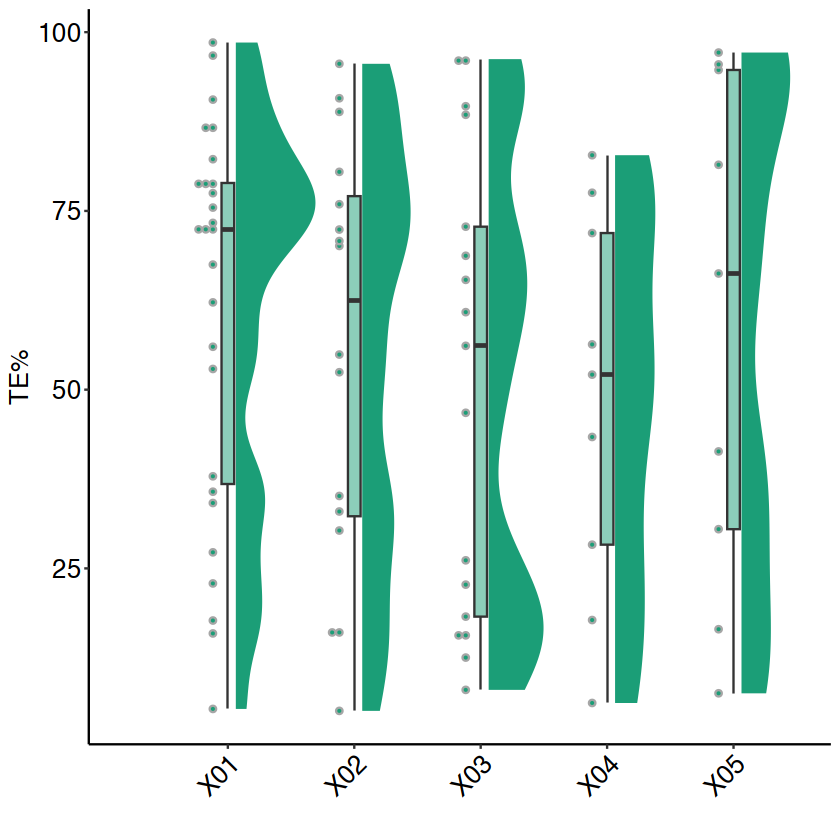

In [91]:
p2

In [92]:
mytest <- "TE%"
mypval2 <- ks.test(pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X01")], pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X04")])$p.value
mypval2 <- formatC(mypval2, format = "e", digits = 2)

In [93]:
p2_stat <- p2 + geom_signif(
    y_position = 100, xmin = 1, xmax = 4,
    annotation = paste0("p = ",mypval2), tip_length = 0.01, textsize = 5
  ) 

Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_signif()`).”


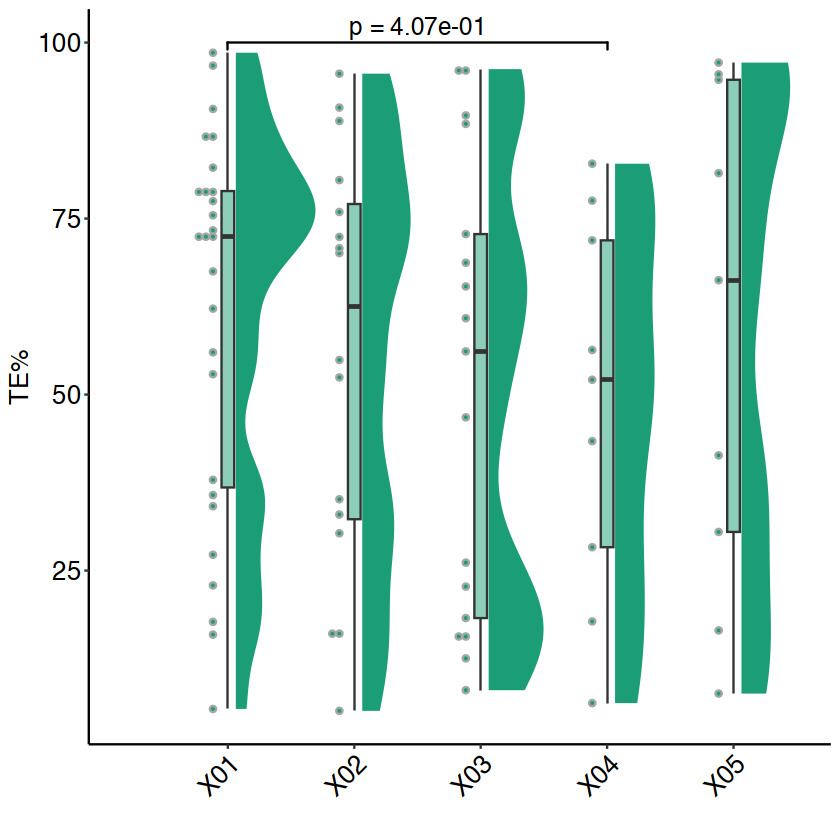

In [94]:
p2_stat

In [95]:
p3 <- baseraincloud_plot.fx(pbmc_leu, "`PD1%`", "cycle", "cancergroup", group_col, 0.5, 2)  

In [96]:
mytest <- "PD1%"
mypval3 <- ks.test(pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X01")], pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X04")])$p.value
mypval3 <- formatC(mypval3, format = "e", digits = 2)

In [97]:
mypval3

[1] "8.33e-03"

In [98]:
p3_stat <- p3 + geom_signif(
    y_position = 100, xmin = 1, xmax = 4,
    annotation = paste0("p = ",mypval3), tip_length = 0.01, textsize = 5
  ) 

In [99]:
p4 <- baseraincloud_plot.fx(pbmc_leu, "`LAG3%`", "cycle", "cancergroup", group_col, 0.5, 2)  

Warning message:
“Removed 169 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 169 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 169 rows containing missing values (`stat_slabinterval()`).”


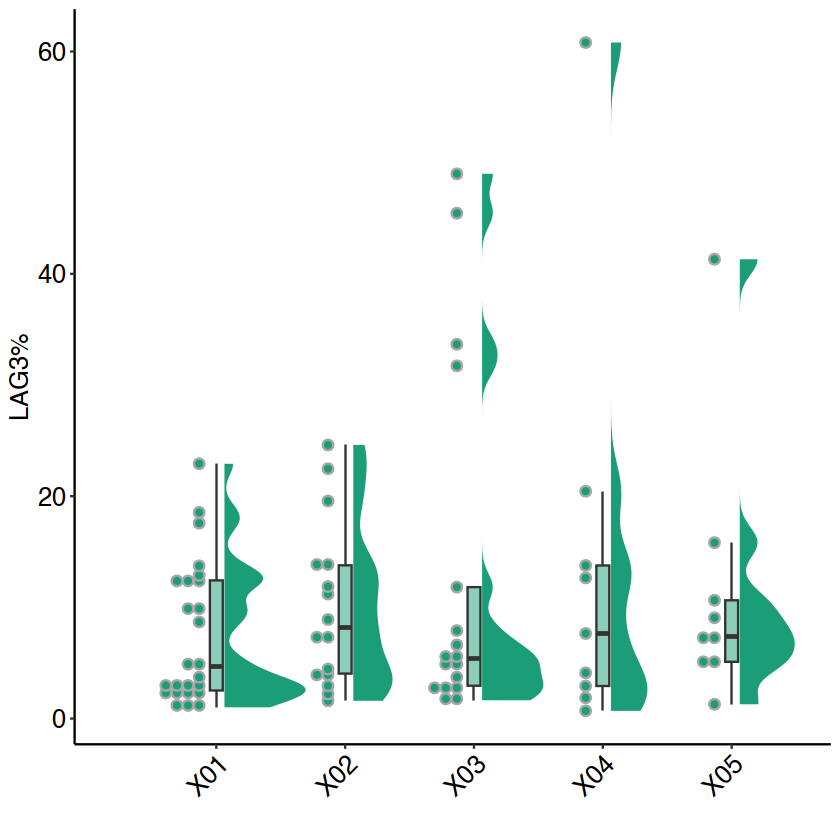

In [100]:
p4

In [101]:
mytest <- "LAG3%"
mypval4 <- ks.test(pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X01")], pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X05")])$p.value
mypval4 <- formatC(mypval4, format = "e", digits = 2)

In [102]:
p4_stat <- p4 + geom_signif(
    y_position = 100, xmin = 1, xmax = 4,
    annotation = paste0("p = ",mypval4), tip_length = 0.01, textsize = 5
  ) 

In [103]:
pdf(paste0(plotpath, "rainclouds_naive_te_pd1_lag3_leukemia.pdf"), width = 4, height = 10)
plot_grid(p1_stat, p2_stat,p3_stat, p4_stat, nrow = 4, align = "v", axis = "lr")
dev.off()

Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 170 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 170 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 170 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 170 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 169 rows containing missing valu

pdf 
  2